## A2b : IPL Performance vs Salary

                        Gauri Vinod Nair
                        V01110160

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv('IPL_ball_by_ball_updated till 2024.csv')

C:\Users\gauri\AppData\Local\Temp\ipykernel_27640\2420847839.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('IPL_ball_by_ball_updated till 2024.csv')


In [3]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255759 entries, 0 to 255758
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Match id             255759 non-null  int64  
 1   Date                 255759 non-null  object 
 2   Season               255759 non-null  object 
 3   Batting team         255759 non-null  object 
 4   Bowling team         255759 non-null  object 
 5   Innings No           255759 non-null  int64  
 6   Ball No              255759 non-null  float64
 7   Bowler               255759 non-null  object 
 8   Striker              255759 non-null  object 
 9   Non Striker          255759 non-null  object 
 10  runs_scored          255759 non-null  int64  
 11  extras               255759 non-null  int64  
 12  type of extras       13823 non-null   object 
 13  score                255759 non-null  int64  
 14  score/wicket         255759 non-null  object 
 15  wicket_confirmati

In [4]:
print(data.head())

   Match id        Date   Season           Batting team  \
0    335982  18-04-2008  2007/08  Kolkata Knight Riders   
1    335982  18-04-2008  2007/08  Kolkata Knight Riders   
2    335982  18-04-2008  2007/08  Kolkata Knight Riders   
3    335982  18-04-2008  2007/08  Kolkata Knight Riders   
4    335982  18-04-2008  2007/08  Kolkata Knight Riders   

                  Bowling team  Innings No  Ball No   Bowler      Striker  \
0  Royal Challengers Bangalore           1      0.1  P Kumar   SC Ganguly   
1  Royal Challengers Bangalore           1      0.2  P Kumar  BB McCullum   
2  Royal Challengers Bangalore           1      0.2  P Kumar  BB McCullum   
3  Royal Challengers Bangalore           1      0.3  P Kumar  BB McCullum   
4  Royal Challengers Bangalore           1      0.4  P Kumar  BB McCullum   

   Non Striker  runs_scored  extras type of extras  score score/wicket  \
0  BB McCullum            0       1        legbyes      1          1/0   
1   SC Ganguly            0       

In [5]:
# Data Cleaning
# Check for missing values
print(data.isnull().sum())

Match id                    0
Date                        0
Season                      0
Batting team                0
Bowling team                0
Innings No                  0
Ball No                     0
Bowler                      0
Striker                     0
Non Striker                 0
runs_scored                 0
extras                      0
type of extras         241936
score                       0
score/wicket                0
wicket_confirmation         0
wicket_type            243108
fielders_involved      246637
Player Out             243108
dtype: int64


In [6]:
# Dropping rows with missing critical values (e.g., 'runs_scored', 'Bowler', 'Striker')
data.dropna(subset=['runs_scored', 'Bowler', 'Striker'], inplace=True)

In [7]:
# Fill missing values for non-critical columns with appropriate values
data['extras'].fillna(0, inplace=True)
data['type of extras'].fillna('None', inplace=True)
data['wicket_confirmation'].fillna('No', inplace=True)
data['wicket_type'].fillna('None', inplace=True)
data['fielders_involved'].fillna('None', inplace=True)
data['Player Out'].fillna('None', inplace=True)

In [8]:
print(data.isnull().sum())

Match id               0
Date                   0
Season                 0
Batting team           0
Bowling team           0
Innings No             0
Ball No                0
Bowler                 0
Striker                0
Non Striker            0
runs_scored            0
extras                 0
type of extras         0
score                  0
score/wicket           0
wicket_confirmation    0
wicket_type            0
fielders_involved      0
Player Out             0
dtype: int64


In [9]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\gauri\AppData\Local\Temp\ipykernel_27640\2154577900.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [10]:
# Feature Engineering
# Create a player performance dataset
performance = data.groupby(['Striker']).agg({
    'runs_scored': 'sum',
    'Ball No': 'count',
    'wicket_confirmation': lambda x: (x == 'Yes').sum()
}).rename(columns={'Ball No': 'balls_faced', 'wicket_confirmation': 'wickets_lost'})

performance['strike_rate'] = (performance['runs_scored'] / performance['balls_faced']) * 100


In [11]:
performance

,runs_scored,balls_faced,wickets_lost,strike_rate
Striker,,,,
A Ashish Reddy,280,196,0,142.857143
A Badoni,536,441,0,121.541950
A Chandila,4,7,0,57.142857
A Chopra,53,75,0,70.666667
A Choudhary,25,20,0,125.000000
...,...,...,...,...
Yashpal Singh,47,67,0,70.149254
Younis Khan,3,7,0,42.857143
Yudhvir Singh,1,2,0,50.000000


In [14]:
# Load player salaries data (assuming we have a dataset named 'IPL_player_salaries.csv')
salaries = pd.read_excel('IPL SALARIES 2024.xlsx')
salaries.head()

,Player,Salary,Rs,international,iconic
0,Abhishek Porel,20 lakh,20,0,NaN
1,Anrich Nortje,6.5 crore,650,1,NaN
2,Axar Patel,9 crore,900,0,NaN
3,David Warner,6.25 crore,625,1,NaN
4,Ishant Sharma,50 lakh,50,0,NaN


In [31]:
# Function to convert salary strings to numeric values
def convert_salary(salary):
    try:
        if 'crore' in salary:
            return float(salary.replace(' crore', '').replace(',', '')) * 10**7
        elif 'lakh' in salary:
            return float(salary.replace(' lakh', '').replace(',', '')) * 10**5
        else:
            return float(salary.replace(',', ''))
    except ValueError:
        print(f"Problematic salary value: {salary}")
        return np.nan

In [32]:
# Apply conversion function to salary column
salaries['Salary'] = salaries['Salary'].apply(convert_salary)

Problematic salary value: 50 lakhs
Problematic salary value: 6.75 Crore
Problematic salary value: 16 Crore
Problematic salary value: 8.25 Crore


In [33]:
# Drop rows with NaN salary values
salaries.dropna(subset=['Salary'], inplace=True)

In [34]:
# Merge performance data with salaries
player_data = pd.merge(performance, salaries, how='inner', left_on='Striker', right_on='Player')

In [35]:
player_data

,runs_scored,balls_faced,wickets_lost,strike_rate,Player,Salary,Rs,international,iconic
0,545,377,0,144.562334,Abdul Samad,40000000.0,400,0,NaN
1,1196,823,0,145.321993,Abhishek Sharma,65000000.0,650,0,NaN
2,19,12,0,158.333333,Akash Deep,2000000.0,20,0,NaN
3,4,5,0,80.000000,Akash Madhwal,2000000.0,20,0,NaN
4,134,111,0,120.720721,Anmolpreet Singh,2000000.0,20,0,NaN
5,318,276,0,115.217391,Anuj Rawat,34000000.0,340,0,NaN
6,13,9,0,144.444444,Arjun Tendulkar,3000000.0,30,0,NaN
7,25,38,0,65.789474,Arshdeep Singh,40000000.0,400,0,NaN
8,201,150,0,134.000000,Atharva Taide,2000000.0,20,0,NaN
9,254,171,0,148.538012,Dhruv Jurel,2000000.0,20,0,NaN


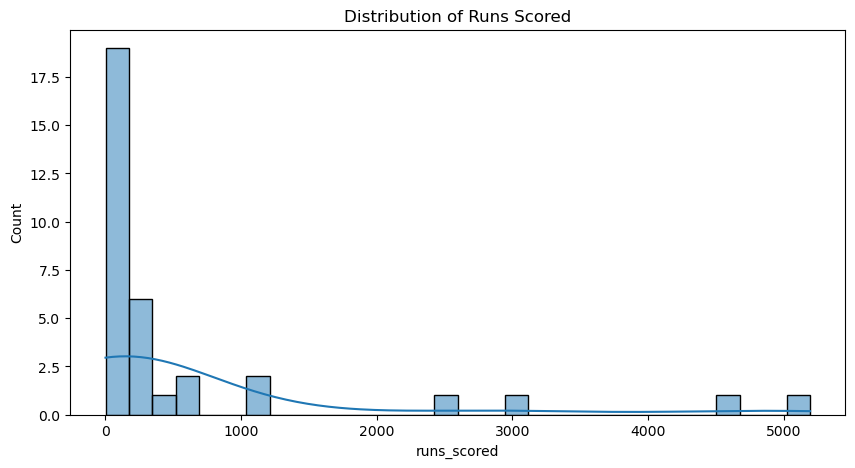

In [36]:
# Exploratory Data Analysis (EDA)
# Plotting distributions of key variables
plt.figure(figsize=(10, 5))
sns.histplot(player_data['runs_scored'], bins=30, kde=True)
plt.title('Distribution of Runs Scored')
plt.show()

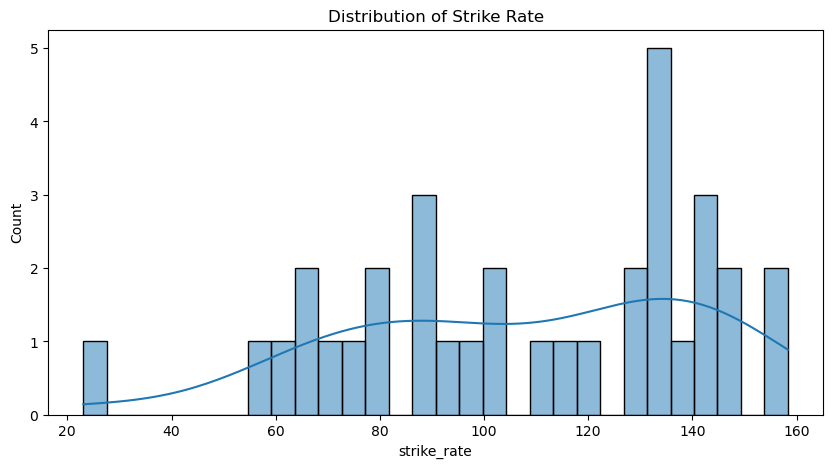

In [37]:
plt.figure(figsize=(10, 5))
sns.histplot(player_data['strike_rate'], bins=30, kde=True)
plt.title('Distribution of Strike Rate')
plt.show()

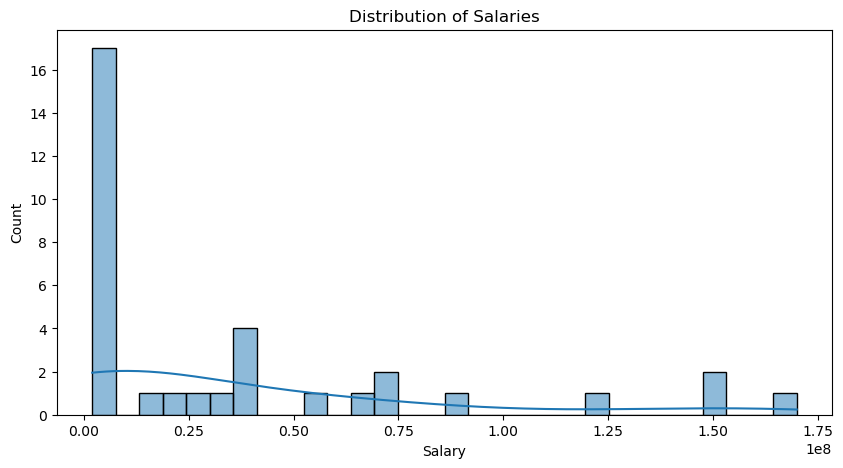

In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(player_data['Salary'], bins=30, kde=True)
plt.title('Distribution of Salaries')
plt.show()

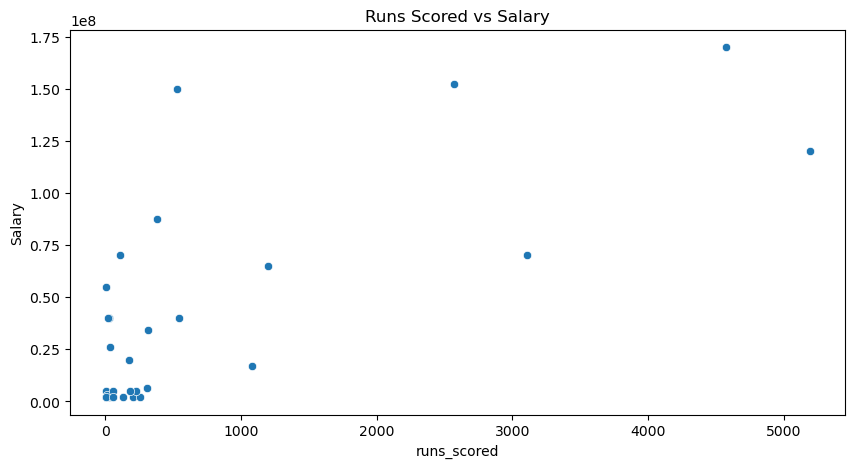

In [39]:
# Scatter plots to visualize relationships
plt.figure(figsize=(10, 5))
sns.scatterplot(x='runs_scored', y='Salary', data=player_data)
plt.title('Runs Scored vs Salary')
plt.show()

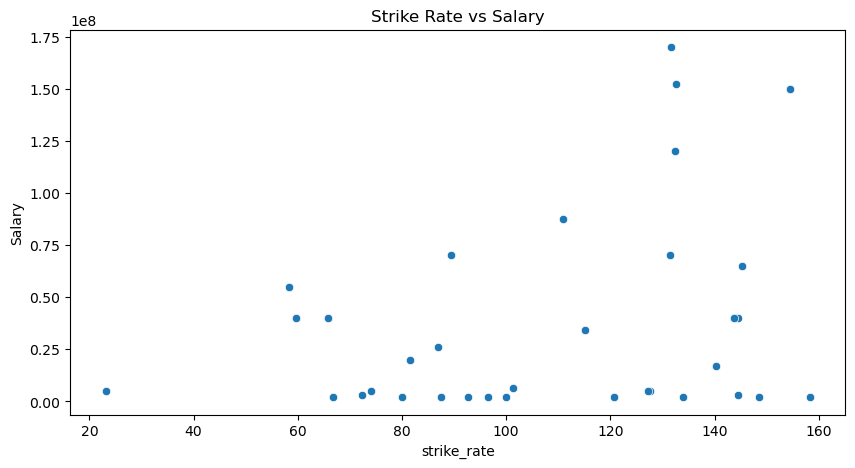

In [40]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='strike_rate', y='Salary', data=player_data)
plt.title('Strike Rate vs Salary')
plt.show()

In [41]:
# Regression Analysis
# Define the feature matrix (X) and target vector (y)
X = player_data[['runs_scored', 'strike_rate']]
y = player_data['Salary']

In [42]:
y.head()

0    40000000.0
1    65000000.0
2     2000000.0
3     2000000.0
4     2000000.0
Name: Salary, dtype: float64

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Create a linear regression model
model = LinearRegression()
model

LinearRegression()

In [45]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([2.74197179e+07, 1.87241082e+07, 1.07269788e+08, 2.26858861e+07,
       2.11553710e+07, 2.87689363e+07, 2.08076474e+07])

In [49]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2501431087895611.5
R^2 Score: 0.0474552594538632


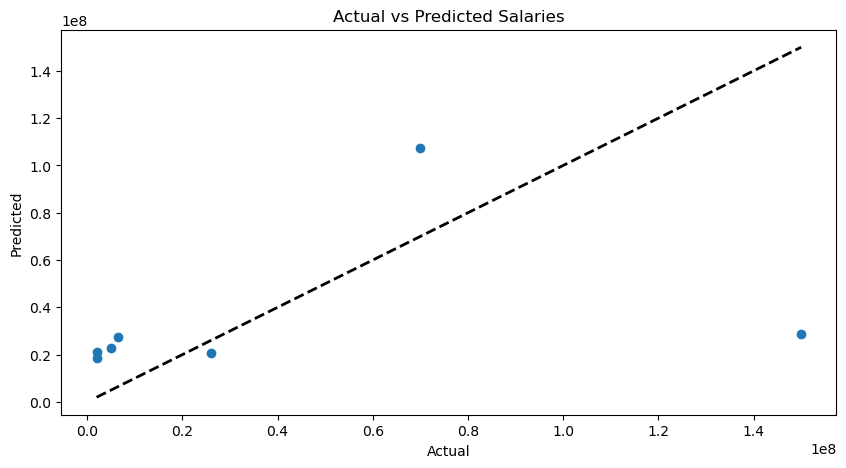

In [50]:
# Plotting the regression line
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Salaries')
plt.show()